In [1]:
from cell_2170_model import cell_2170
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model Voltage vs SOC curve

In [2]:
# initialize cell model with terminal voltage of 3.3 V
cell_model = cell_2170(initial_voltage=3.3)

output_variables = [
    "Terminal voltage [V]",
    "Current [A]",
    # "Electrolyte concentration [mol.m-3]",
    # "Negative particle surface concentration [mol.m-3]",
    # "Positive particle surface concentration [mol.m-3]",
    "Discharge capacity [A.h]"
]

cell_model.sim_cali.plot(output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=9.089076541737196, step=0.09089076541737195)…

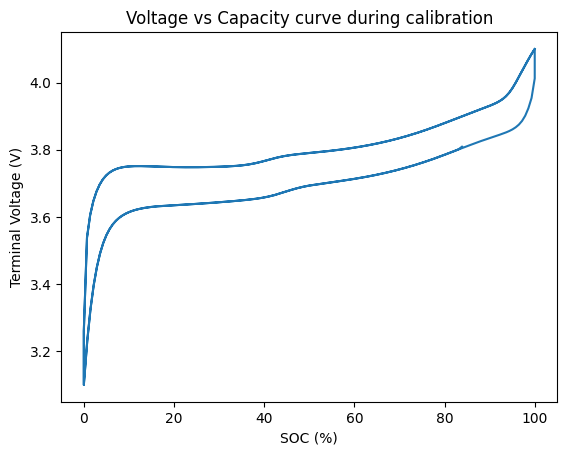

In [20]:
SOC_array = cell_model.cali_capacity_array / cell_model.total_capacity * 100

fig, ax = plt.subplots()
ax.plot(SOC_array, cell_model.cali_v_array)
ax.set_title("Voltage vs Capacity curve during calibration")
ax.set_xlabel("SOC (%)")
ax.set_ylabel("Terminal Voltage (V)")
plt.show()

# Trial 1: Charge at constant current

### Single Cell of 2170

In [4]:
# initialize cell model with terminal voltage of 3.3 V
cell_model = cell_2170(initial_voltage=3.3)

# Charge the cell at 1.5 amps until 4.1 V
cell_capacity_array, cell_v_array = cell_model.discharge_n_charge("current", 3, "voltage", 4.1)

In [5]:
cell_capacity_array = cell_capacity_array.reshape((len(cell_capacity_array),1))
cell_v_array = cell_v_array.reshape((len(cell_v_array),1))

SOC_array = cell_capacity_array / cell_model.total_capacity
SOC_array = SOC_array.reshape((len(SOC_array),1))

pandas_array = np.concatenate((cell_v_array, cell_capacity_array, SOC_array), axis=1)

In [6]:
column_values = ['voltage', 'capacity', 'SOC']

df_cell = pd.DataFrame(data = pandas_array, 
                       columns = column_values)

In [7]:
df_cell

,voltage,capacity,SOC
0,3.808957,3.971301,0.838603
1,3.801671,3.937968,0.831564
2,3.797504,3.904635,0.824525
3,3.793705,3.871301,0.817486
4,3.790039,3.837968,0.810447
...,...,...,...
119,3.475498,0.059836,0.012635
120,3.680726,0.111086,0.023458
121,3.721486,0.162336,0.034280
122,3.742646,0.213586,0.045102


In [8]:
output_variables = [
    "Terminal voltage [V]",
    "Current [A]",
    # "Electrolyte concentration [mol.m-3]",
    # "Negative particle surface concentration [mol.m-3]",
    # "Positive particle surface concentration [mol.m-3]",
    "Discharge capacity [A.h]"
]

cell_model.sim_charge_n_discharge.plot(output_variables)

interactive(children=(FloatSlider(value=0.0, description='t', max=2.0240659821799762, step=0.02024065982179976…

### Assembly of cells for model 3 battery pack
4,416 pcs of 2170 cells:
- 46 cells in parallel (summing capacity) for each group
- 96 groups in series (summing voltage).

In [9]:
df_pack = df_cell

df_pack['voltage'] = df_cell.copy()['voltage'] * 96
df_pack['capacity'] = df_cell.copy()['capacity'] * 46

df_pack

,voltage,capacity,SOC
0,365.659862,182.679864,0.838603
1,364.960377,181.146531,0.831564
2,364.560421,179.613197,0.824525
3,364.195725,178.079864,0.817486
4,363.843697,176.546531,0.810447
...,...,...,...
119,333.647764,2.752460,0.012635
120,353.349701,5.109960,0.023458
121,357.262668,7.467460,0.034280
122,359.294056,9.824960,0.045102


# Trial 2: Charge at constant power

### Single Cell of 2170

In [10]:
# 18 kw charging
# 18000 / 96 / 46

round(18000 / 96 / 46)

4

In [11]:
# initialize cell model with terminal voltage of 3.3 V
cell_model = cell_2170(initial_voltage=3.3)

# Charge the cell at 4 W until 4.1 V
cell_capacity_array, cell_v_array = cell_model.discharge_n_charge("power", 4, "voltage", 4.1)

In [12]:
cell_capacity_array = cell_capacity_array.reshape((len(cell_capacity_array),1))
cell_v_array = cell_v_array.reshape((len(cell_v_array),1))

SOC_array = cell_capacity_array / cell_model.total_capacity
SOC_array = SOC_array.reshape((len(SOC_array),1))

pandas_array = np.concatenate((cell_v_array, cell_capacity_array, SOC_array), axis=1)

In [13]:
column_values = ['voltage', 'capacity', 'SOC']

df_cell = pd.DataFrame(data = pandas_array, 
                       columns = column_values)

In [14]:
# df_cell

### Assembly of cells for model 3 battery pack
4,416 pcs of 2170 cells:
- 46 cells in parallel (summing capacity) for each group
- 96 groups in series (summing voltage).

In [15]:
df_pack = df_cell

df_pack['voltage'] = df_cell.copy()['voltage'] * 96
df_pack['capacity'] = df_cell.copy()['capacity'] * 46

df_pack

,voltage,capacity,SOC
0,365.659862,182.679864,0.838603
1,364.960377,181.146531,0.831564
2,364.560421,179.613197,0.824525
3,364.195725,178.079864,0.817486
4,363.843697,176.546531,0.810447
...,...,...,...
119,329.322890,2.752460,0.012635
120,342.285602,3.651414,0.016762
121,345.480612,4.528940,0.020790
122,347.604005,5.399722,0.024788
